# Deeper Dive: Decision Trees and Random Forests

In [1]:
# Modified from the example written by yhat that can be found here:
# http://blog.yhathq.com/posts/random-forests-in-python.html

%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Pick 75% of the data as training data.
# The is_train column will contain True or False depening on
# whether item is in the training set or the test set
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# Map targets (0, 1, 2) to species names, so species column
# indicates the species of iris, rather than just 0-2
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

train, test = df[df['is_train'] == True], df[df['is_train'] == False]
features = df.columns[:4]

# y has to be numeric targets, so convert species column to numbers
# _ is a valid variable in Python, but is typically used to indicate
# that we don't care about the value being placed into it. That is,
# factorize()vreturns two things, and we only care about the first.
y, _ = pd.factorize(train['species'])

In [2]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(train[features], y)

preds = iris.target_names[tree.predict(test[features])]
pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,11,0,0
versicolor,0,10,0
virginica,0,1,11


In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris_tree.dot",
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True,
               filled=True)

In [4]:
!dot -Tpng iris_tree.dot -o iris_tree.png

/bin/sh: dot: command not found


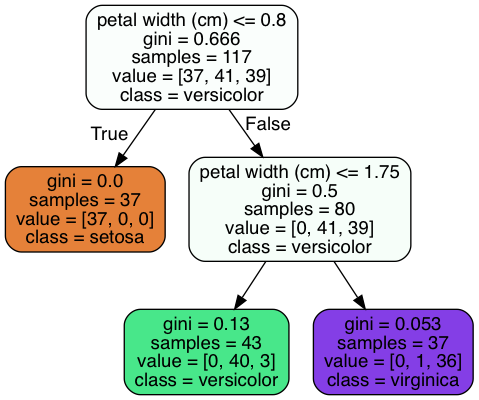

In [5]:
from IPython.display import Image
Image('iris_tree.png')

## Now le'ts try a random forest...

In [6]:
forest = RandomForestClassifier(n_jobs=2, n_estimators=50)
forest.fit(train[features], y)

preds = iris.target_names[forest.predict(test[features])]
pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,13,0,0
versicolor,0,9,1
virginica,0,0,11


In [7]:
importances = forest.feature_importances_
indices = np.argsort(importances)

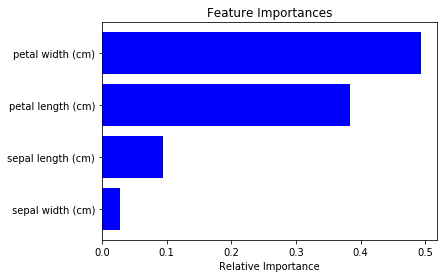

In [8]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');